# Creating Dataset
This notebook selects female poets from the [Poetry Foundation Dataset (Kaggle)](https://www.kaggle.com/tgdivy/poetry-foundation-poems) and creates visualizations and data analysis on the text.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df_raw = pd.read_csv('PoetryFoundationData.csv')

df_poets = pd.read_csv('all_poets_gender - final.csv')

print(f"shape of dataframe: {df_raw.shape}")
df_raw.head()

shape of dataframe: (13854, 5)


,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN


## Selecting List of Poets

In [3]:
all_poets = list(set(df_raw['Poet']))
print('The dataset has {number} poets'.format(number = len(all_poets)))
all_poets

The dataset has 3128 poets


['erica lewis',
 'George Henry Boker',
 'Hugo Williams',
 'Thomas Carew',
 'Monica Ferrell',
 'Theodore Deppe',
 'Seth Abramson',
 'Jane Wong',
 'Queen Elizabeth I',
 'Cathy Park Hong',
 'Toby Altman',
 'Noah Buchholz',
 'Eva Gore-Booth',
 'Donovan Kūhiō Colleps',
 'Elizabeth-Jane Burnett',
 'Donald Justice',
 'Charles North',
 'Melvin Dixon',
 'Luljeta Lleshanaku',
 'Takashi Hiraide',
 'Will Allen Dromgoole',
 'Terry Wolverton',
 'Giacomo Leopardi',
 'James Longenbach',
 'Emmett Tenorio Melendez',
 'Howard Moss',
 'Mark Laliberte',
 'Momina Mela',
 'Tomas Tranströmer',
 'Luke Davies',
 'James Galvin',
 'Melissa Range',
 'Dorothea Lasky',
 'Cathy Linh Che',
 'David Kirby',
 'Rabindranath Tagore',
 'George Bowering',
 'D. Nurkse',
 'Michael Prior',
 'Thomas McCarthy',
 'Frank Lima',
 'Keith Waldrop',
 'Jocelyn Saidenberg',
 'Carolyn Creedon',
 'James Tate',
 'Richard Tagett',
 'Carrie Fountain',
 'Max Garland',
 'Olivia Clare',
 'Sharon Chmielarz',
 'Linda Gregerson',
 'Jean Follain',
 

In [4]:
with open('all_poets.txt', 'w', encoding='utf-8') as f:
    for poet in all_poets:
        f.write("%s\n" % poet)

### To be continued

In [5]:
df_female_poets = df_poets[(df_poets['gender']=='F') | (df_poets['gender']=='NB') | 
                           (df_poets['gender']=='T')]
df_nonbinary_poets = df_poets[(df_poets['gender']=='NB') | 
                           (df_poets['gender']=='T')]

print(df_female_poets.shape, df_nonbinary_poets.shape)

df_female_poets

(1115, 3) (6, 3)


,poet,gender,Unnamed: 2
2,Allison Adelle Hedge Coke,F,NaN
5,Twyla Hansen,F,NaN
13,Lucy Larcom,F,NaN
14,Georgia Douglas Johnson,F,NaN
15,Alli Warren,F,NaN
...,...,...,...
3115,Kathleen Graber,F,NaN
3118,Elizabeth Bentley,F,NaN
3121,Sheena Raza Faisal,F,NaN
3123,Kate Potts,F,NaN


## Merge Tagged Poets Dataset to Poetry Foundation

We only want to keep the poems that were tagged with a gender that is either female, non-binary, or trans, and that have some tags.

In [6]:
df_poetry = df_raw.merge(df_female_poets, left_on='Poet', right_on='poet', how='left')
df_poetry.drop(columns=['poet', 'Unnamed: 0', 'Unnamed: 2'], inplace=True)

# The `Gay, Lesbian, Queer` category gives problems when splitting at `,`, so we replace it.
def fix_tags(tags):
    if pd.isna(tags):
        return tags
    return tags.replace('Gay, Lesbian, Queer', 'LGBTQ')

df_poetry['Tags'] = df_poetry['Tags'].map(fix_tags)

df_poetry = df_poetry[((df_poetry['gender']=='F') | (df_poetry['gender']=='NB') |
                       (df_poetry['gender']=='T')) & (~ df_poetry['Tags'].isna())]

df_poetry.to_csv('female_poets_with_tags.csv')

df_poetry.head(10)

,Title,Poem,Poet,Tags,gender
6,\r\r\n Invisible Fish\r\r\n...,\r\r\nInvisible fish swim this ghost ocean now...,Joy Harjo,"Living,Time & Brevity,Relationships,Family & A...",F
7,\r\r\n Don’t Bother the Ear...,\r\r\nDon’t bother the earth spirit who lives ...,Joy Harjo,"Religion,The Spiritual,Mythology & Folklore,Fa...",F
9,"\r\r\n [""Hour in which I co...","\r\r\nHour in which I consider hydrangea, a sa...",Simone White,"Living,Parenthood,The Body,The Mind,Nature,Tre...",F
18,\r\r\n West of Myself\r\r\n...,\r\r\nWhy are you still seventeen\r\r\nand dri...,Debora Greger,Coming of Age,F
19,\r\r\n Yes\r\r\n ...,"\r\r\n\r\r\n\r\r\n\r\r\nYes, your childhood no...",Debora Greger,"Coming of Age,Youth",F
21,\r\r\n History\r\r\n ...,"\r\r\nOf course wars, of course lice, of cours...",Barbara Ras,"History & Politics,War & Conflict",F
22,\r\r\n What It Was Like\r\r...,"\r\r\nIf they ask what it was like, say it was...",Barbara Ras,Money & Economics,F
23,\r\r\n All\r\r\n ...,"\r\r\nThe prisoner can’t go any longer, but he...",Barbara Ras,"Life Choices,Faith & Doubt",F
24,\r\r\n Sleeping with Butler...,\r\r\n\r\r\n\r\r\n\r\r\nAfter Octavio Paz\r\r\...,Eugene Gloria,"Language & Linguistics,Poetry & Poets",F
25,\r\r\n Hoodlum Birds\r\r\n ...,\r\r\nThe fearless blackbirds see me again\r\r...,Eugene Gloria,Animals,F


In [7]:
df_poetry.isna().sum()

Title     0
Poem      0
Poet      0
Tags      0
gender    0
dtype: int64

In [8]:
poetry_tags = df_poetry['Tags'].map(lambda x: x.split(',')).explode().value_counts()
poetry_tags = poetry_tags.where(lambda x: x >20).dropna()

poetry_tags = poetry_tags.to_frame()

print(len(poetry_tags), poetry_tags.index)

poetry_tags.head(73)

89 Index(['Living', 'Relationships', 'Social Commentaries', 'Nature',
       'Arts & Sciences', 'Love', 'Activities', 'Family & Ancestors',
       'The Body', 'Time & Brevity', 'Life Choices', 'History & Politics',
       'Death', 'Religion', 'Animals', 'The Mind', 'Gender & Sexuality',
       'Sorrow & Grieving', 'Men & Women', 'Desire', 'Poetry & Poets',
       'War & Conflict', 'Travels & Journeys', 'Race & Ethnicity', 'Home Life',
       'Philosophy', 'Trees & Flowers', 'Parenthood', 'Landscapes & Pastorals',
       'Realistic & Complicated', 'Mythology & Folklore', 'Seas', ' Rivers',
       ' & Streams', 'Cities & Urban Life', 'Language & Linguistics',
       'Disappointment & Failure', 'Christianity', 'Growing Old',
       'The Spiritual', 'Health & Illness', 'Romantic Love',
       'Eating & Drinking', 'Marriage & Companionship', 'Reading & Books',
       'Coming of Age', 'Heartache & Loss', 'Jobs & Working',
       'Friends & Enemies', 'God & the Divine', 'Class', 'Music',
    

,Tags
Living,1967.0
Relationships,1247.0
Social Commentaries,1241.0
Nature,1100.0
Arts & Sciences,853.0
...,...
Youth,59.0
Infatuation & Crushes,58.0
Sports & Outdoor Activities,53.0
Summer,51.0


## Filtering the Categories

In [9]:
variables = poetry_tags.index

tags_keep = ['Arts & Sciences', 
             'Love',
             'Death',
             'The Mind', 
             'Gender & Sexuality',
             'Sorrow & Grieving', 
             'Desire', 
             'Race & Ethnicity',
             'Parenthood', 
             'Landscapes & Pastorals',
             'Realistic & Complicated', 
             'Cities & Urban Life', 
             'Friends & Enemies', 
             'Humor & Satire', 'Pets',
             'Fairy-tales & Legends', 
             'LGBTQ']


tags_trash = set(variables) - set(tags_keep)
df_poetry_clean = poetry_tags.drop(tags_trash, axis=0)
df_poetry_clean

,Tags
Arts & Sciences,853.0
Love,703.0
Death,407.0
The Mind,321.0
Gender & Sexuality,309.0
Sorrow & Grieving,297.0
Desire,262.0
Race & Ethnicity,241.0
Parenthood,203.0
Landscapes & Pastorals,203.0


<AxesSubplot:>

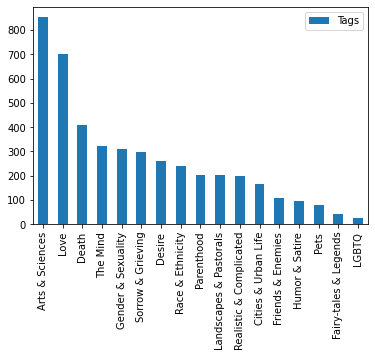

In [10]:
df_poetry_clean.plot.bar()

# Creating the training data

For each of the tags chosen above, we want to create a file with all matching poems by female/non-binary/trans poets.

For training, we also need files of the poems for each tag, where the poems are separated by empty lines.

In [11]:
import os

directory_csv = 'female_poets_per_tag'
directory_txt = 'training_data_per_tag'
os.makedirs(directory_csv, exist_ok=True)
os.makedirs(directory_txt, exist_ok=True)

chosen_tags = df_poetry_clean.index

for tag in chosen_tags:
    # Create a CSV file with the poems matching the given tag.

    def contains_tag(tags):
        if pd.isna(tags):
            return False
        return tag in tags.split(',')

    df_with_tag = df_poetry[df_poetry.Tags.map(contains_tag)]
    df_with_tag.to_csv('{}/{}.csv'.format(directory_csv, tag))

    # Create a TXT file with all poems matching the given tag.

    def clean_poem(poem):
        poem = poem.replace('\r', '')
        poem = poem.strip('\n')
        return poem

    # Remove duplicates.
    cleaned_poems = set(df_with_tag['Poem'].map(clean_poem))
    with open('{}/{}.txt'.format(directory_txt, tag), 'w', encoding='utf-8') as f:
        f.write('\n~~~\n'.join(cleaned_poems))


# Visualize commonly used words

In [12]:
# Preprocessing function

def text_preprocessing(text, spelling=False):
    '''
    NLP preprocessing steps in a given dataframe and returns a preprocessed dataframe
    1. Remove contractions
    2. Tokenization
    3. Lowercasing
    4. Remove punctuation
    5. Remove stopwords
    6. Replace misspelled words
    7. Lemmatization
    
    Arguments:
    `descriptions`: descriptions to be preprocessed
    '''
    # Make sure we have a column of a data frame as input
    text = pd.Index(text).fillna('')
    
    # 1. Removing contractions
    preprocessed = text.map(lambda x: [contractions.fix(word) for word in x.split()])
    preprocessed = preprocessed.map(lambda x: ' '.join(w for w in x))
    
    # 2. Tokenization
    preprocessed = preprocessed.map(word_tokenize)
    
    # 3. Set all words to lower case
    preprocessed = preprocessed.map(lambda x: [word.lower() for word in x])
    
    # 4. Remove punctuation
    punc = string.punctuation
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in punc])
    
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in stop_words])
    
    # 6. Replace misspelling
    if spelling:
        spell = SpellChecker()
        preprocessed = preprocessed.map(lambda x: [spell.correction(word) for word in x])
  
    # 7. Lemmatization
    
    preprocessed = preprocessed.map(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    preprocessed = preprocessed.map(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                               for (word, pos_tag) in x])
    
    wnl = WordNetLemmatizer()
    preprocessed = preprocessed.map(lambda x: [wnl.lemmatize(word, tag) 
                                               for word, tag in x])
#    now = datetime.now()

#    print("Current Time =", now)
    return preprocessed

In [13]:

def plot_top_keywords_barchart(text, title, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_keywords=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_keywords))
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor("white")
    plt.title(title)
    plt.xlabel("Keywords Frequency")
    plt.ylabel("Top 20 Keywords mentioned in Service Description")
    sns.barplot(x=y,y=x)

In [16]:
import contractions
import string
import nltk
import regex as re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

tag = 'LGBTQ'

def contains_tag(tags):
        if pd.isna(tags):
            return False
        return tag in tags.split(',')

def clean_poem(poem):
        poem = poem.replace('\r', '')
        poem = poem.strip('\n')
        return poem
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vinze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vinze\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


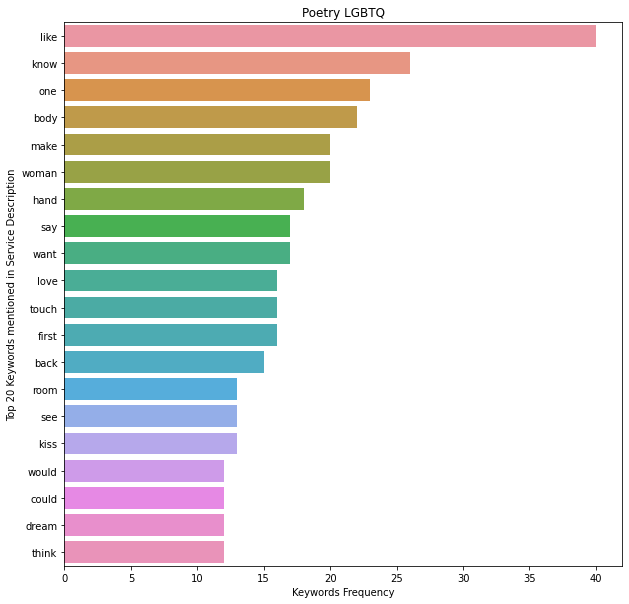

In [17]:
# Preprocess poems with given tag, and remove duplicates
df_poetry_with_tag = df_poetry[df_poetry['Tags'].map(contains_tag)].copy()
df_poetry_with_tag.drop_duplicates('Poem', inplace=True)
df_poetry_with_tag['preprocessed_text'] = df_poetry_with_tag['Poem'].map(clean_poem)
df_poetry_with_tag['preprocessed_text'] = text_preprocessing(df_poetry_with_tag['preprocessed_text'])
df_poetry_with_tag['preprocessed_text'] = df_poetry_with_tag['preprocessed_text'].map(lambda l: ' '.join(l))

plot_top_keywords_barchart(df_poetry_with_tag['preprocessed_text'], f'Poetry {tag}', 1)
#plot_top_keywords_barchart(df_poetry[df_poetry['Tags'].map(contains_tag)]['preprocessed_text'], 'LGBTQ', 1)
#df_poetry_with_tag['preprocessed_text']

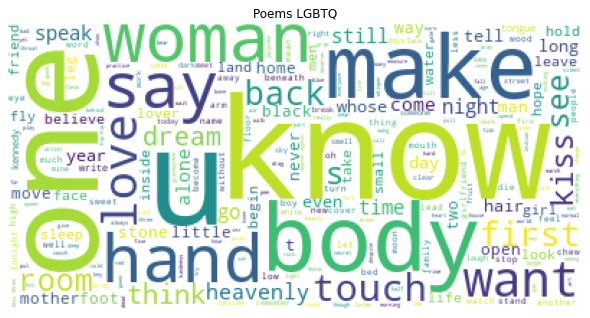

In [18]:
def wordcloud(sentence, title):

    stopword = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=stopword, 
                          contour_width=1).generate(' '.join(sentence))   

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    
wordcloud(df_poetry_with_tag['preprocessed_text'], f'Poems {tag}')

In [19]:
#Bi-grams 

def plot_top_bigrams_barchart(text, title, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor("white")
    plt.title(title)
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel(f"Top 20 bi-grams")
    sns.barplot(x=y,y=x)

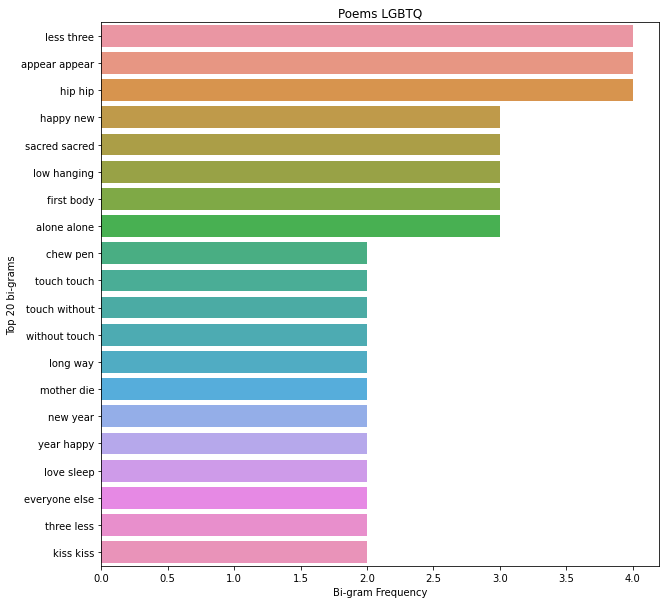

In [20]:
plot_top_bigrams_barchart(df_poetry_with_tag['preprocessed_text'], f'Poems {tag}', 2)